# **Atividade 1 - Transformações Lineares**

Importamos a biblioteca `matplotlib` para criar as visualizações gráficas e o `numpy` para realizar os cálculos matriciais.

In [600]:
import matplotlib.pyplot as plt
import numpy as np

Definimos a função `plot_vectors` para criar a visualização dos vetores em um gráfico usando a função `plot_graph` como auxiliar.

In [601]:
def plot_vectors(
    titulos: list[str],
    vectors1: np.ndarray,
    vectors2: np.ndarray | None = None,
    *,
    comparison: bool,
) -> None:
    def plot_graph(vectors: list, ax: plt.Axes, title: str, colors: np.ndarray) -> None:
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.axhline(0, color="black", linewidth=1)
        ax.axvline(0, color="black", linewidth=1)
        ax.set_xticks(range(-5, 6))
        ax.set_yticks(range(-5, 6))
        ax.grid(visible=True)

        for i, vec in enumerate(vectors):
            ax.quiver(0, 0, *vec, angles="xy", scale_units="xy", scale=1, color=colors[i], zorder=3)

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(title)

    colors = plt.cm.tab10(range(len(vectors1)))

    if not comparison:
        _, ax = plt.subplots(figsize=(6, 6))
        plot_graph(vectors1, ax, titulos[0], colors)

    else:
        _, axes = plt.subplots(1, 2, figsize=(12, 6))
        plot_graph(vectors1, axes[0], titulos[0], colors)
        plot_graph(vectors2, axes[1], titulos[1], colors)

    plt.show()

## 1.1 Vetores Unitários

Os vetores unitários de $\mathbb{R}^2$ são $\hat i = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ e $\hat j = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. Dessa forma, matricialmente, temos $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.

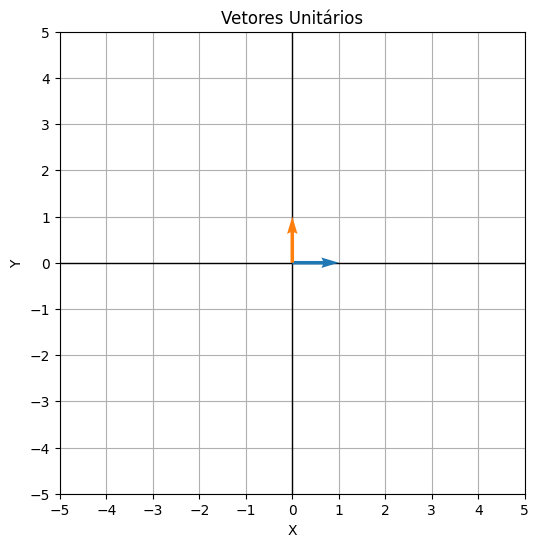

In [602]:
unit_vectors = [[1, 0], [0, 1]]

plot_vectors(["Vetores Unitários"], unit_vectors, comparison=False)

## 1.2 Rotação Horária de 90°

### 1.2.1 Explicação

Aplicar uma rotação horário de 90° nos vetores unitários fará o $\hat i$ que está no ponto $(1, 0)$ ir para o $(0, -1)$ e o $\hat j$ que está no ponto $(0, 1)$ ir para o $(1, 0)$. Ou seja, após a rotação, $\hat i = \begin{bmatrix} 0 \\ -1 \end{bmatrix}$ e $\hat j = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$. Dessa forma, matricialmente, temos $\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$,

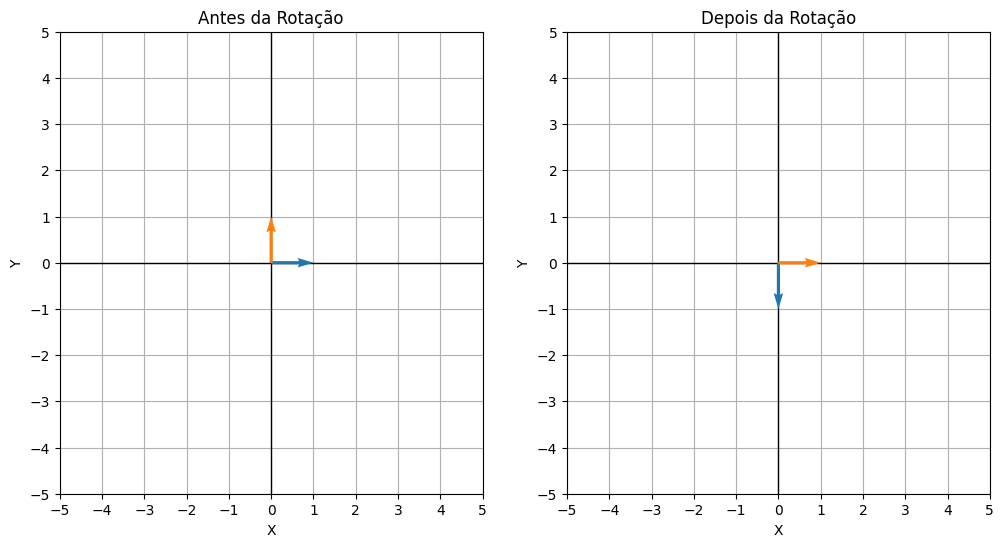

In [603]:
unit_vectors = [[1, 0], [0, 1]]
rotationed_unit_vectors = [[0, -1], [1, 0]]

plot_vectors(
    ["Antes da Rotação", "Depois da Rotação"],
    unit_vectors,
    rotationed_unit_vectors,
    comparison=True,
)

Assim, concluímos que a matriz de rotação horária de 90° é dada por $R = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$.

In [604]:
rotation_matrix = np.array([[0, 1], [-1, 0]])

### 1.2.2 Exemplo

Usamos 3 vetores arbitrários e multiplicamos cada um pela matriz de rotação encontrada anteriormente para visualizar a transformação.

Matriz de Vetores Arbitrários:
[[ 2 -1]
 [ 3  2]]
Matriz de Vetores Arbitrários após Rotação Horária de 90°:
[[ 3  2]
 [-2  1]]


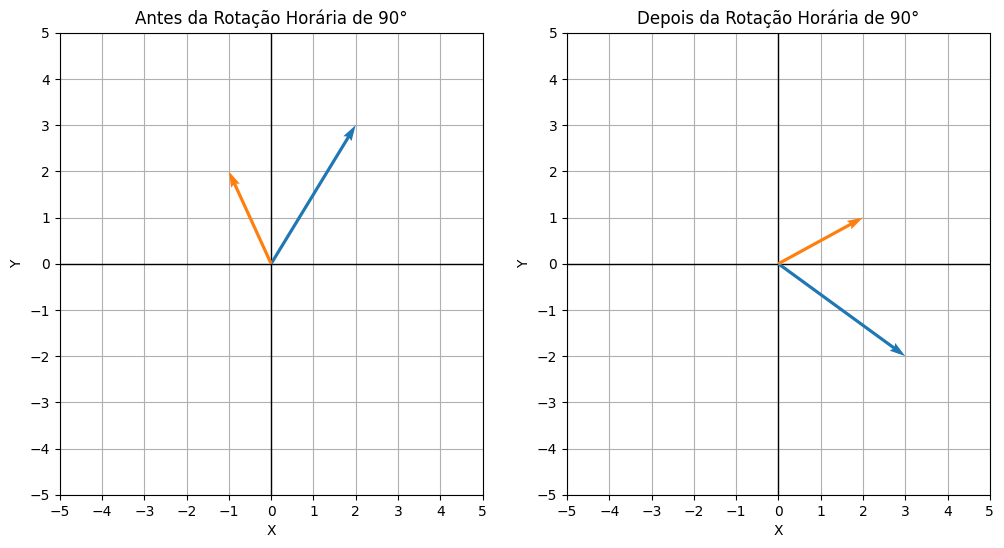

In [605]:
vectors = np.array([[2, 3], [-1, 2]])
rotationed_vectors = np.array([rotation_matrix @ vector for vector in vectors])

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários após Rotação Horária de 90°:")
print(rotationed_vectors.T)

plot_vectors(
    ["Antes da Rotação Horária de 90°", "Depois da Rotação Horária de 90°"],
    vectors, rotationed_vectors,
    comparison=True,
)

## 1.3 *Shear*

### 1.3.1 Explicação

O shear em $x$ (horizontal) é uma transformação que empurra para os lados todos os vetores (ou pontos) proporcionalmente ao valor de $y$. Aplicar um *shear* horizontal usando $2$ como uma constante de proporcionalidade fará o $\hat i$ se manter no ponto $(1, 0)$, uma vez que a sua coordenada $y$ é $0$ e o $\hat j$ que está no ponto $(0, 1)$ ir para o $(2, 1)$. Ou seja, após a aplicação do *shear* horizontal, $\hat i = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ e $\hat j = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$. Dessa forma, matricialmente, temos $\begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}$,

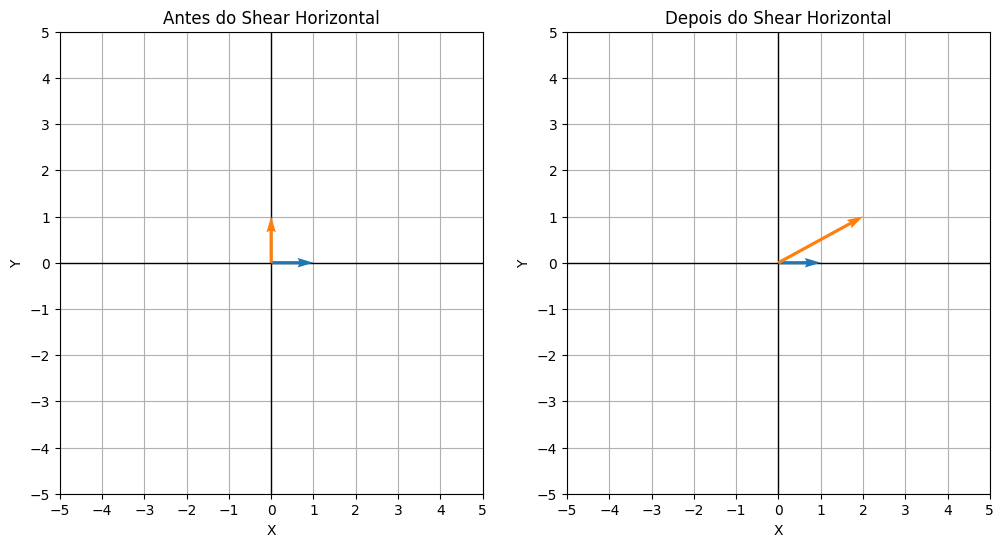

In [606]:
unit_vectors = [[1, 0], [0, 1]]
sheared_unit_vectors = [[1, 0], [2, 1]]

plot_vectors(
    ["Antes do Shear Horizontal", "Depois do Shear Horizontal"],
    unit_vectors,
    sheared_unit_vectors,
    comparison=True,
)

Generalizando para qualquer constante de proporcionalidade $k$, concluímos que a matriz de *shear* horizontal é dada por $S_x = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix}$. Onde a transformação linear aplicada é $T(x, y) = (x + ky, y)$.

In [607]:
def get_shear_matrix(k: float) -> np.ndarray:
    return np.array([[1, k], [0, 1]])

### 1.3.2 Exemplo

Matriz de Shear Horizontal (k = 2):
[[1 2]
 [0 1]]
Matriz de Vetores Arbitrários:
[[ 1 -1]
 [ 2 -1]]
Matriz de Vetores Arbitrários após Shear Horizontal:
[[ 5 -3]
 [ 2 -1]]


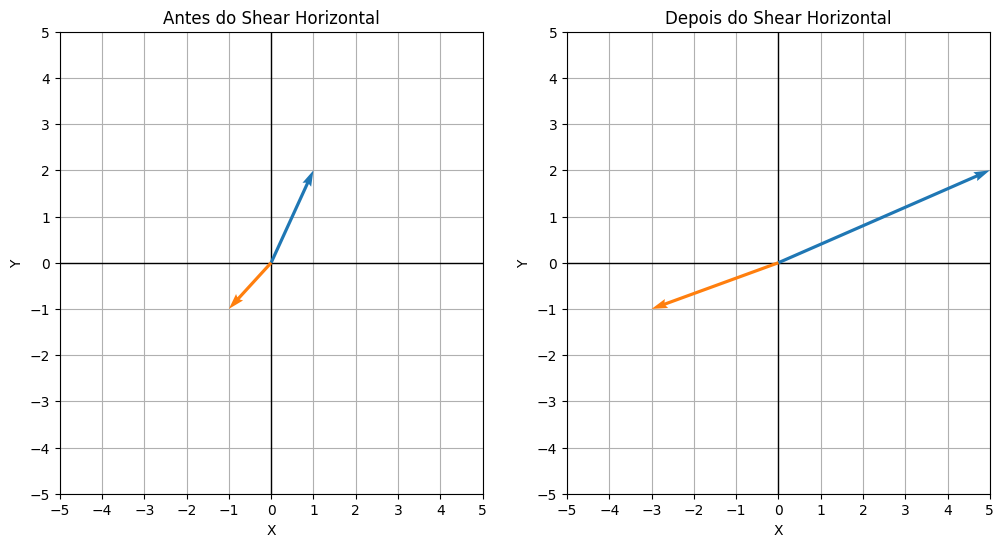

In [608]:
k = 2
shear_matrix = get_shear_matrix(k)

vectors = np.array([[1, 2], [-1, -1]])
sheared_vectors = np.array([shear_matrix @ vector for vector in vectors])

print(f"Matriz de Shear Horizontal (k = {k}):")
print(shear_matrix)

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários após Shear Horizontal:")
print(sheared_vectors.T)

plot_vectors(
    ["Antes do Shear Horizontal", "Depois do Shear Horizontal"],
    vectors,
    sheared_vectors,
    comparison=True,
)